In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Computer Vision/final project'

/content/drive/MyDrive/Computer Vision/final project


In [ ]:
#import all necessary libraries 
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [ ]:
# img =np.array(Image.open('original_image.png').convert('L'))
img =np.array(Image.open('image5.png'))


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

In [ ]:
img.shape

(597, 910, 3)

In [ ]:
import numpy as np
from scipy.signal import convolve2d
from math import sqrt

def find_energy(img):
    img =np.array(Image.open('image5.png').convert('L'))
    blurred_image = cv2.GaussianBlur(img, (5,5), 1.0)   
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    energy_x = convolve2d(blurred_image, sobel_x, mode='same', boundary='symm')
    energy_y = convolve2d(blurred_image, sobel_y, mode='same', boundary='symm')
    energy = np.sqrt(np.square(energy_x) + np.square(energy_y))
    return energy

In [ ]:
energy = find_energy(img)

original image shape: (597, 910, 3)
scaled image shape: (597, 910)


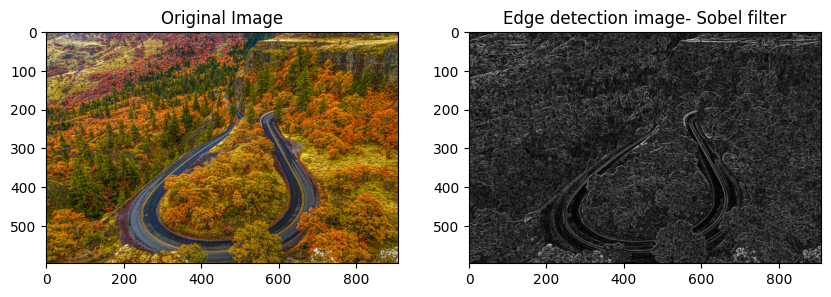

In [ ]:
import matplotlib.pyplot as plt

# Display the original and edge detection image images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
print("original image shape:",img.shape )
print("scaled image shape:",energy.shape )

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(energy,cmap='gray')
ax[1].set_title('Edge detection image- Sobel filter')
plt.show()

In [ ]:
def find_energy_map(energy):
    #initializing the energy map with zeros with same dimensions as energy matrix
    energy_map = np.zeros(energy.shape)
    energy_map[-1,:]= energy[-1,:]  #the last row of energy map and energy should be the same 

    directions = np.zeros(energy.shape, dtype =int) #will store the best direction to move at each pixel in the energy map

    #loop through rows of energy from second last to the top
    for i in range(energy.shape[0]-2, -1, -1):
      for j in range(energy.shape[1]): #loop through the columns of energy
        current_energy = np.min( energy_map[i + 1, max(0, j-1): min(j+2, energy.shape[1])])  # finding the minimum energy of the three pixels below
        pixel_index = np.argmin( energy_map[i +1, max(0, j-1): min(j + 2, energy.shape[1])]) + max(0, j-1) -1 
        energy_map[i, j] = energy[i, j] + current_energy
        directions[i, j] = pixel_index
  
    return energy_map, directions 


In [ ]:
energy_map, directions = find_energy_map(energy)

In [ ]:
energy_map

array([[20867.71531399, 20854.70228449, 20840.08635569, ...,
        19386.22936475, 19380.66535579, 19362.94259125],
       [20949.07102214, 20851.90392569, 20832.74778609, ...,
        19320.53217028, 19341.40193202, 19370.91971164],
       [20890.52189747, 20898.16297682, 20792.81077887, ...,
        19281.93765703, 19313.99871375, 19321.13413927],
       ...,
       [  212.53259945,   257.32154276,   339.92737769, ...,
          520.05101702,   489.34403837,   469.57726525],
       [  121.43924075,   173.61726567,   270.00485454, ...,
          263.65625469,   240.67528294,   212.69986258],
       [   40.81666326,   113.35784049,   146.81280598, ...,
           65.9241989 ,    61.40032573,    44.38468204]])

Energy shape is: (597, 910)
Energy map shape is : (597, 910)


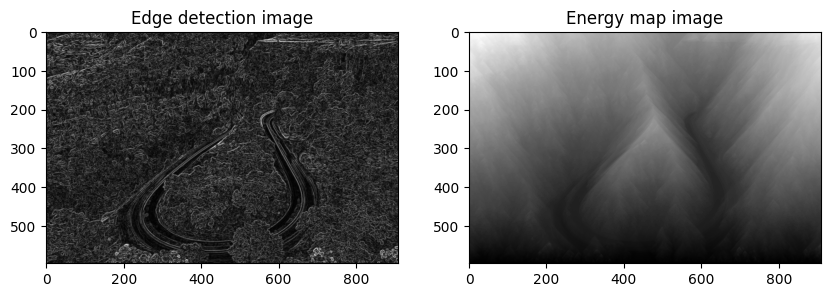

In [ ]:
#display both images side by side, edge detection image and energy map

fig, ax = plt.subplots(1, 2, figsize = (10,5))
print("Energy shape is:", energy.shape )
print("Energy map shape is :", energy_map.shape)

ax[0].imshow(energy, cmap = "gray")
ax[0].set_title("Edge detection image")
ax[1].imshow(energy_map, cmap = "gray")
ax[1].set_title("Energy map image")
plt.show()

In [ ]:
def find_seams(directions, element):
  seam = np.zeros(directions.shape[0], dtype =int)
  seam[0] = element 
  for i in range(1, directions.shape[0]):  
    #determing the right, left and previous column so the seam will be inside the image
    prev_column = seam[i-1 ]
    left_column = max(0, prev_column -1)
    right_column = min(directions.shape[1]-1, prev_column + 1)

    next_column = np.argmin(energy_map[i, left_column:right_column + 1 ]) + left_column  #finding the column with the lowest energy and adding it to the seam array 
    seam[i] = next_column

  return seam 



In [ ]:
seam = find_seams(directions, 70)
seam 

array([ 70,  71,  72,  73,  74,  75,  76,  77,  77,  76,  76,  77,  78,
        79,  80,  80,  80,  81,  82,  83,  84,  85,  86,  85,  85,  84,
        83,  82,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 105, 104, 105, 106, 107, 107, 108, 109, 109, 110, 111, 110,
       111, 112, 112, 111, 111, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       130, 131, 132, 132, 132, 133, 134, 135, 135, 134, 134, 135, 136,
       137, 138, 139, 139, 140, 141, 140, 141, 141, 142, 143, 144, 145,
       146, 146, 145, 146, 147, 148, 147, 148, 149, 150, 151, 151, 150,
       151, 151, 150, 149, 150, 151, 150, 151, 152, 153, 153, 154, 155,
       154, 154, 155, 155, 155, 155, 156, 157, 158, 158, 159, 159, 159,
       158, 157, 156, 155, 154, 153, 153, 154, 154, 155, 155, 155, 155,
       154, 154, 154, 155, 155, 155, 156, 156, 156, 156, 156, 15

In [ ]:
min_element =  np.argmin(energy_map[0,:])  #finding the element with minimum energy in the top row
seam = find_seams(directions, min_element)  #finding the lowest energy seam from top to bottom

In [ ]:
seam 

array([542, 542, 542, 542, 542, 543, 544, 543, 543, 544, 544, 545, 545,
       546, 546, 545, 544, 543, 542, 541, 541, 540, 539, 539, 539, 539,
       539, 538, 537, 536, 535, 534, 533, 532, 531, 530, 529, 528, 527,
       526, 526, 526, 526, 525, 524, 524, 523, 522, 521, 522, 523, 524,
       525, 525, 525, 524, 523, 523, 523, 522, 521, 522, 522, 523, 522,
       522, 523, 524, 525, 526, 527, 528, 529, 530, 530, 531, 531, 532,
       533, 533, 534, 535, 536, 537, 538, 539, 540, 541, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 559, 560, 560, 561, 562, 563, 564, 565, 565, 565,
       565, 566, 567, 568, 569, 570, 571, 571, 571, 572, 573, 574, 575,
       576, 575, 576, 577, 578, 578, 578, 578, 579, 579, 579, 580, 579,
       578, 577, 578, 579, 578, 577, 576, 576, 577, 578, 579, 580, 581,
       582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
       595, 596, 597, 598, 598, 598, 598, 598, 599, 599, 600, 60

In [ ]:
seam.shape[0]

597

In [ ]:
def remove_seam(img, seam):
  h, w, _ = img.shape
  new_image = np.zeros((h, w-200, 3), dtype = np.uint8) #creating a new image but with a reduced number of pixels for the width 

  for i in range(h): #going though each row of the image and remove the pixels for the seam found earlier 
    j = seam [i]
    new_image[i, :, :] = np.concatenate((img[i, :j, :], img[i, j+200:, :] ), axis = 0)  #Concatenating both sides of the image without the seams 

  return new_image


In [ ]:
#Draw the seam on the original image
for i, j in enumerate(seam):
    img[i, j] = [255, 0, 0]  # Set the pixel to red

In [ ]:
new_image = remove_seam(img, seam)
new_image.shape

(597, 710, 3)

original image shape: (597, 910, 3)
scaled image shape: (597, 710, 3)


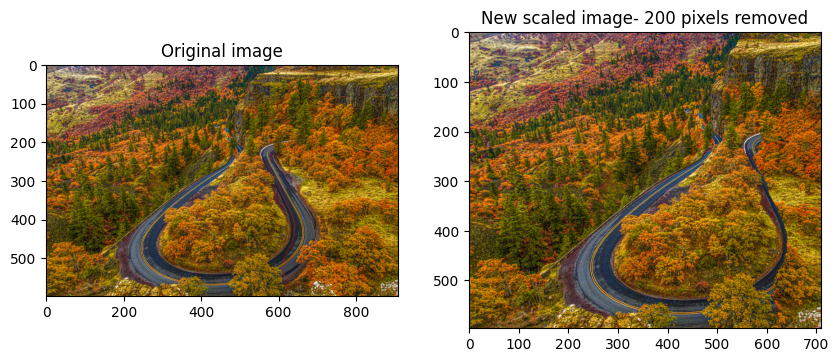

In [ ]:
# Display the original image and the scaled images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
print("original image shape:",img.shape )
print("scaled image shape:",new_image.shape )

ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(new_image,cmap='gray')
ax[1].set_title('New scaled image- 200 pixels removed')
plt.show()

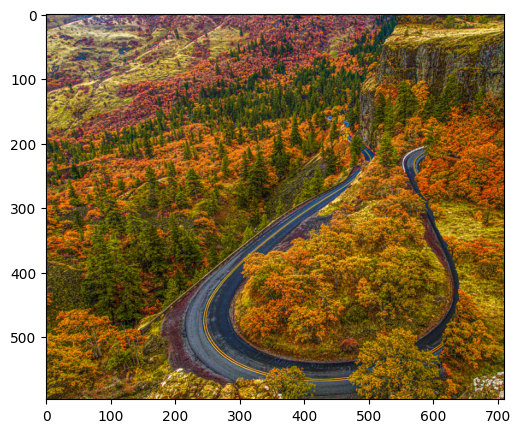

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(new_image )
plt.show()